**MRI Speech Identification**

We want to identify vocals with real-time MRI data. The MRI records peoples vocal tract while speaking. Our approach is to take pixel vectors of every time frame where A, E and O is spoken. Then give this vectors to a LSTM Model, which should pedict what letter a person is currently speaking.

[GitHub](https://github.com/Johannes-Walter/MRI-Speech-Identification/blob/main/train_Johannes.ipynb)

Code-Demo

## Imports

In [1]:
#connect to gdrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
import sys
sys.path.insert(0,"/content/drive/My Drive/Colab Notebooks")
import data_preparer
import data_reader
from data_vectorizer import Vectorizer
from pathlib import Path
from keras.utils import to_categorical
import torch
import tensorflow as tf
import keras

# Setup Training Data

In [3]:
# Setup traing data
vectors, letters = data_preparer.get_randomized_vectors(100)
x_validate, y_validate = data_preparer.get_default_vectors()
length = data_preparer.get_max_frames()

vectors = data_preparer.make_numpy(vectors, length)
x_validate = data_preparer.make_numpy(x_validate, length)

/content/drive/My Drive/Colab Notebooks/data/sub001


In [4]:
items = set(letters)
items.update(y_validate)

items = {
    item: idx
    for idx, item in enumerate(items)
}

for idx, item in enumerate(letters):
    letters[idx] = items[item]
for idx, item in enumerate(y_validate):
    y_validate[idx] = items[item]

In [5]:
letters = np.array(letters)
letters = keras.utils.to_categorical(letters)
y_validate = np.array(y_validate)
y_validate = keras.utils.to_categorical(y_validate)

In [6]:
vectors.shape

(18000, 7, 1860)

In [7]:
letters.shape

(18000, 3)

Vectors consist of (Letters, Vecotrs, pixel length*timephrames)

**Letters**: How many letters we are using -> 18000

**Vectors**: How many vectors we are using frame per frame -> 7

**Pixel lenght**: How long is one vector -> 20 pixel

**Timephrames**: how many timephrames per letter (this differs form letter to letter -> filled with zeros)

# Training

In [8]:
model = keras.Sequential()
keras.layers.Layer()
model.add(keras.layers.LSTM(20))
model.add(keras.layers.Dense(3, activation='sigmoid'))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vectors, letters, test_size=0.2, random_state=13)

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(X_train, y_train,
          epochs=10,
          verbose=1
          )

Epoch 1/10
450/450 [==============================] - 8s 12ms/step - loss: 0.6419 - accuracy: 0.3646
Epoch 2/10
450/450 [==============================] - 7s 15ms/step - loss: 0.6316 - accuracy: 0.3638
Epoch 3/10
450/450 [==============================] - 5s 12ms/step - loss: 0.6290 - accuracy: 0.3942
Epoch 4/10
450/450 [==============================] - 6s 14ms/step - loss: 0.6276 - accuracy: 0.3872
Epoch 5/10
450/450 [==============================] - 6s 13ms/step - loss: 0.6233 - accuracy: 0.4072
Epoch 6/10
450/450 [==============================] - 6s 13ms/step - loss: 0.6213 - accuracy: 0.4148
Epoch 7/10
450/450 [==============================] - 7s 16ms/step - loss: 0.6221 - accuracy: 0.3955
Epoch 8/10
450/450 [==============================] - 6s 12ms/step - loss: 0.6198 - accuracy: 0.4041
Epoch 9/10
450/450 [==============================] - 7s 16ms/step - loss: 0.6192 - accuracy: 0.4265
Epoch 10/10
450/450 [==============================] - 6s 13ms/step - loss: 0.6187 - accura

In [9]:
score, acc = model.evaluate(X_test, y_test)

113/113 [==============================] - 4s 8ms/step - loss: 0.6185 - accuracy: 0.4261


# Prediction

Wir lesen die CSV Tabelle und die passende H5 Datei ein:

In [10]:
timestamps = data_reader.get_timestamps('/content/drive/My Drive/Colab Notebooks/data/sub001/timestamps/sub001_2drt_01_vcv1_r1_recon.csv')
timestamps

,Buchstabe,Buchstabenr.,Timestamp start,Timestamp ende,first_frame,last_frame
0,A,1,0 days 00:00:01.726000,0 days 00:00:02.348000,143.0,195.0
1,A,2,0 days 00:00:02.605000,0 days 00:00:03.079000,216.0,256.0
2,O,1,0 days 00:00:04.369000,0 days 00:00:04.644000,363.0,386.0
3,O,2,0 days 00:00:04.844000,0 days 00:00:05.293000,403.0,440.0
4,E,1,0 days 00:00:06.452000,0 days 00:00:06.720000,537.0,559.0
5,E,2,0 days 00:00:06.889000,0 days 00:00:07.336000,573.0,610.0
6,A,3,0 days 00:00:08.342000,0 days 00:00:08.567000,694.0,713.0
7,A,4,0 days 00:00:08.822000,0 days 00:00:09.348000,734.0,778.0
8,O,3,0 days 00:00:10.435000,0 days 00:00:10.522000,869.0,876.0
9,O,4,0 days 00:00:10.773000,0 days 00:00:11.216000,897.0,934.0


In [11]:
recon = data_reader.get_recon('sub001_2drt_01_vcv1_r1_recon.h5')
recon

array([[[ 25.52947807,  19.4853611 ,  30.89460373, ...,  98.42479706,
          44.64346695, 107.51438904],
        [ 32.15190125,  13.87260723,  15.70765495, ..., 102.3542099 ,
          86.98400879,  66.88175964],
        [ 28.86750793,  18.92897797,   3.64901137, ...,  62.36549377,
          90.75772858,  69.96509552],
        ...,
        [ 39.63859177,  40.24220657,  32.62986374, ...,  47.44071579,
          75.16679382, 150.60792542],
        [  7.83577919,  30.93974304,  37.56563187, ...,  13.19073009,
          84.4291153 , 119.56649017],
        [ 13.083848  ,  40.89576721,  21.82175064, ..., 137.2555542 ,
         148.56011963,  80.77766418]],

       [[ 25.62266159,  19.44618225,  30.86223984, ...,  98.21442413,
          44.60578537, 107.47366333],
        [ 32.05347824,  13.85059452,  15.73060513, ..., 102.25723267,
          86.92198944,  66.85616302],
        [ 28.90059662,  19.00435066,   3.6461184 , ...,  62.19660187,
          90.79077148,  69.95095062],
        ...,


Wir erstellen die Vektoren:

In [12]:
vectorizer = Vectorizer(recon, timestamps)
rel = vectorizer._Vectorizer__get_vectors_relative_position(0)
abss = vectorizer._Vectorizer__get_vectors_absolute_position(rel,0)
mask = vectorizer._Vectorizer__get_mask(abss)

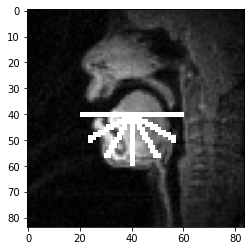

In [13]:
img = np.ma.masked_array(recon[int(timestamps['first_frame'][0])], np.logical_not(mask))
plt.imshow(img, cmap="Greys_r")

Erster Buchstabe der Datei zum testen verwenden -> Buchstabe A

In [14]:
timestamps.iloc[0]

Buchstabe                               A
Buchstabenr.                            1
Timestamp start    0 days 00:00:01.726000
Timestamp ende     0 days 00:00:02.348000
first_frame                         143.0
last_frame                          195.0
Name: 0, dtype: object

Wir erhalten alle Vektoren des Buchstaben:

In [15]:
vector=vectorizer._Vectorizer__get_pixel_data(abss,first_frame=int(timestamps['first_frame'][0]), last_frame= int(timestamps['last_frame'][0]))

In [16]:
vector.shape #(Vektoren,pixel,frames)

(7, 20, 52)

In [17]:
vector = np.expand_dims(vector, axis=0) #damit es in das Modell gegeben werden kann muss noch die Dimension angepasst werden

In [18]:
vector.shape #1 Ist also die Anzahl der Buchstaben in unseren Daten

(1, 7, 20, 52)

In [19]:
vector = data_preparer.make_numpy(vector,length) #vektorenlänge muss auch mit den anderen Vektoren die im Training ins Modell gegeben wurden angepasst

In [20]:
vector.shape

(1, 7, 1860)

In [21]:
letter = model.predict(vector, verbose=1)

1/1 [==============================] - 0s 461ms/step


In [22]:
letter

array([[0.34973946, 0.29243365, 0.3713545 ]], dtype=float32)